# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Omotara\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 11145,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/saqib-shah',
   'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
   'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
   'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
   'publishedAt': '2021-06-09T12:04:40Z',
   'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Matt Novak',
   'title': 'El Salvador Becomes First Country to Recognize Bitcoin as Currency',
   'description': 'El Salvador

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")
ethereum_headlines

{'status': 'ok',
 'totalResults': 3197,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'This blockchain development course bundle is on sale for 97% off',
   'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
   'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
   'publishedAt': '2021-06-17T04:05:00Z',
   'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
3,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940
4,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939
2,2021-05-31,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000
3,2021-06-10,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.179920,0.074800,0.026900,0.89825
std,0.383615,0.069831,0.039178,0.06832
min,-0.557400,0.000000,0.000000,0.71800
25%,0.000000,0.032250,0.000000,0.84475
50%,0.165150,0.065500,0.000000,0.91050
75%,0.401050,0.105500,0.059000,0.94375
max,0.840200,0.282000,0.107000,1.00000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.081370,0.044550,0.020650,0.934800
std,0.345267,0.061021,0.040732,0.067162
min,-0.458800,0.000000,0.000000,0.782000
25%,-0.068300,0.000000,0.000000,0.917000
50%,0.000000,0.000000,0.000000,0.936500
75%,0.361200,0.073000,0.015250,1.000000
max,0.778300,0.191000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop_words = stopwords.words('english')

# Expand the default stopwords list if necessary

stop_words.append("char")



In [12]:
# Complete the tokenizer function 
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    tokens = word_tokenize(text)
    
   
    # Create a tokenized list of the words
    words = [word for word in tokens if word.isalpha()]
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   

   
    # Convert the words to lowercase
 
    
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stop_words]
    return output

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['new_token'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,new_token
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvador, president, nayib, bukele, ha, m..."
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seems, elon, musk, tesla, caus..."
3,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
4,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['new_token'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,new_token
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000,"[tl, dr, cryptocurrency, ethereum, solidity, b..."
1,2021-06-20,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939,"[wa, long, ago, average, person, clue, nft, wa..."
2,2021-05-31,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
3,2021-06-10,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000,"[new, mining, feature, called, crypto, rolling..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_counts =ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(bigram_counts).most_common(20)

[(('el', 'salvador'), 7),
 (('bitcoin', 'legal'), 6),
 (('legal', 'tender'), 5),
 (('reuters', 'el'), 4),
 (('central', 'american'), 3),
 (('june', 'reuters'), 3),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('salvador', 'ha'), 2),
 (('ha', 'become'), 2),
 (('become', 'first'), 2),
 (('first', 'country'), 2),
 (('country', 'world'), 2),
 (('welcome', 'back'), 2),
 (('last', 'week'), 2),
 (('san', 'salvador'), 2),
 (('salvador', 'replace'), 2),
 (('replace', 'dollar'), 2),
 (('dollar', 'bitcoin'), 2),
 (('tender', 'finance'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts =ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(bigram_counts).most_common(20)

[(('digital', 'yuan'), 3),
 (('cryptocurrency', 'ethereum'), 2),
 (('yao', 'qian'), 2),
 (('qian', 'former'), 2),
 (('former', 'head'), 2),
 (('head', 'china'), 2),
 (('china', 'digital'), 2),
 (('previous', 'close'), 2),
 (('close', 'bitcoin'), 2),
 (('bitcoin', 'world'), 2),
 (('world', 'biggest'), 2),
 (('biggest', 'cryptocurrency'), 2),
 (('tl', 'dr'), 1),
 (('dr', 'cryptocurrency'), 1),
 (('ethereum', 'solidity'), 1),
 (('solidity', 'blockchain'), 1),
 (('blockchain', 'developer'), 1),
 (('developer', 'bundle'), 1),
 (('bundle', 'sale'), 1),
 (('sale', 'june'), 1)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(tokens, 10)

[('bitcoin', 15),
 ('salvador', 9),
 ('el', 7),
 ('cryptocurrency', 7),
 ('legal', 6),
 ('ha', 5),
 ('tender', 5),
 ('country', 5),
 ('crypto', 5),
 ('reuters', 5)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
tokens = tokenizer(ethereum_df.text.str.cat())
token_count(tokens, 10)

[('cryptocurrency', 8),
 ('ethereum', 5),
 ('digital', 5),
 ('nft', 4),
 ('world', 4),
 ('bitcoin', 4),
 ('blockchain', 3),
 ('sale', 3),
 ('wa', 3),
 ('may', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

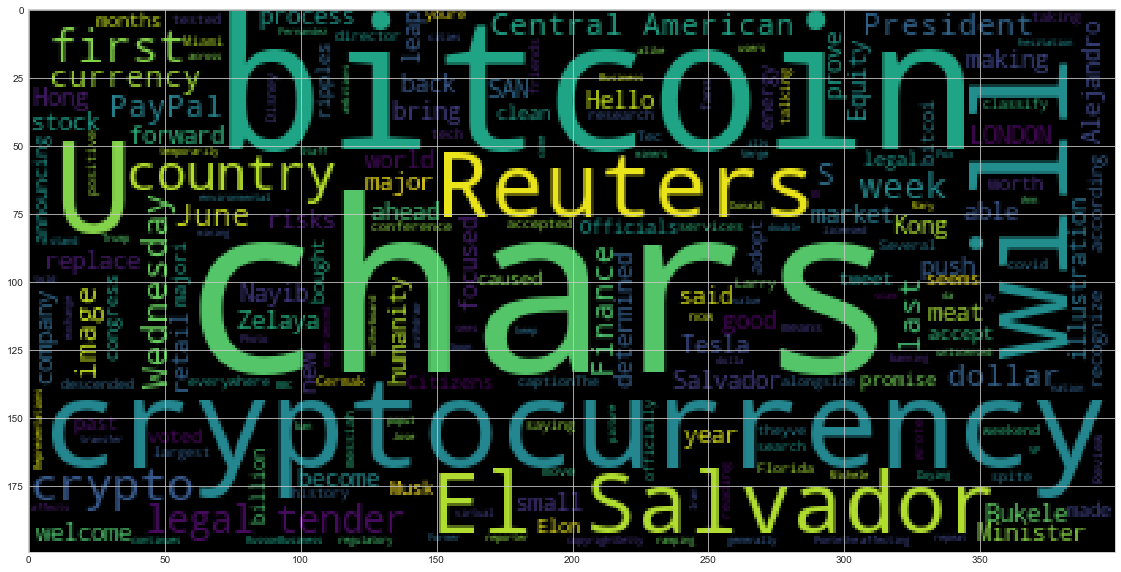

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE
wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc)



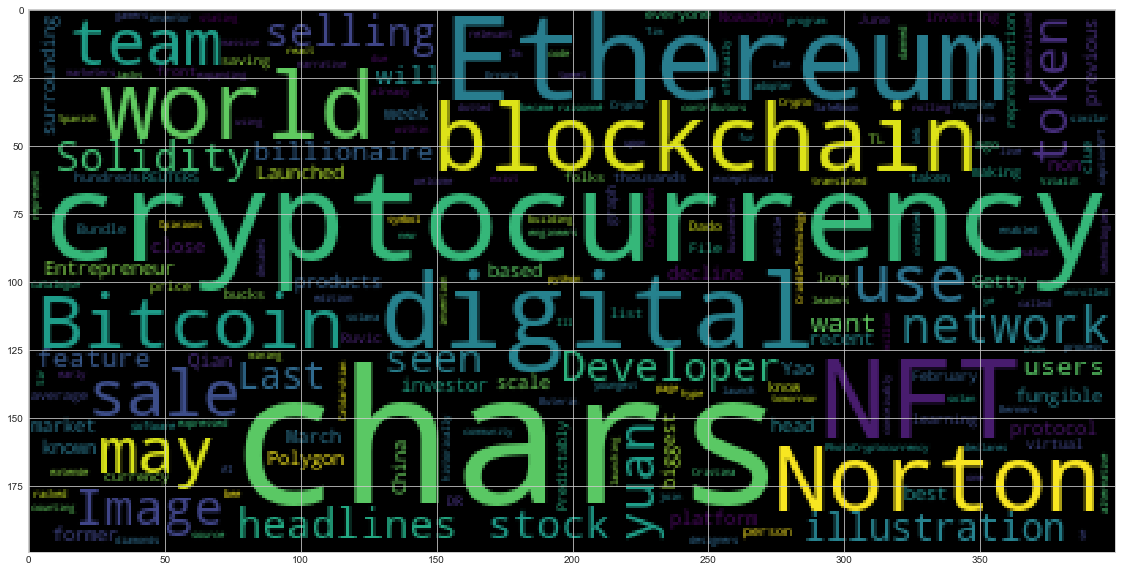

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

2021-06-26 04:08:07.668402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-26 04:08:07.668435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
text = bitcoin_df.text.str.cat()

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "BITCOIN NER"

In [37]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc,style="ent")

In [41]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
Salvador ORG
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
Last week DATE
Disney ORG
This week DATE
Tec PERSON
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
Photo PERSON
Michele Doying PERSON
Verge ORG
Iran GPE
PayPal PERSON
Soon PERSON
PayPal PERSON
U.S. GPE
Bitcoin PERSON
SALVADOR ORG
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
June 23 DATE
Reuters ORG
El Salvador GPE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
text = ethereum_df.text.str.cat()

In [43]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "ETHEREUM NER"

In [44]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc,style="ent")

In [45]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Ethereum ORG
February 19, 2021 DATE
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
chars]"We NORP
Entrepreneur ORG
March 2021 DATE
more than one million CARDINAL
SafeMoon ORG
decades DATE
Ill PERSON
Jacks ORG
CriddleTechnology ORG
Kim Catdarshian PERSON
Ethereum ORG
March 2020 DATE
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Ferdman/Getty Images ORG
Mark Cuban PERSON
Ethereum ORG
Polygon ORG
Polygon ORG
tEhereum ORG
Ethereum ORG
Keep Network ORG
Last week DATE
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
Indonesia GPE
first ORDINAL
today DATE
Qian PERSON
China GPE
Sina Finance ORG
Monday DATE
Entrepreneur PERSON
Costfoto PERSON
Barcroft Media PERSON
Getty Images ORG
Yao Qian PERSON
China GPE
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
2,853.31 MONEY
Bitcoin PERSON
30.8% PERCENT
year DATE
27,734 MONEY
Jan. DATE
5.7

---